In [ ]:
!pip install seaborn

Unique industries in AI dataset: ['Retail' 'Energy' 'Telecommunications' 'Transportation' 'Entertainment'
 'Finance' 'Manufacturing' 'Education' 'Technology' 'Healthcare']

AI Adoption Score Statistics:
count    28.000000
mean      2.071429
std       0.899735
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: AI Adoption Score, dtype: float64

Automation Risk Score Statistics:
count    28.000000
mean      2.000000
std       0.816497
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Automation Risk Score, dtype: float64


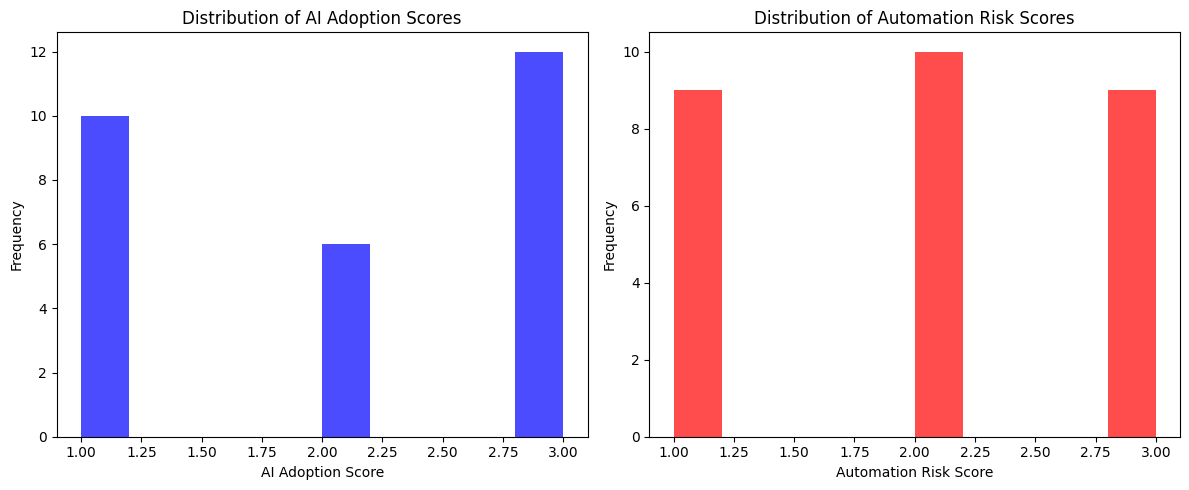


Selected Thresholds - AI Adoption Score: 3.0, Automation Risk Score: 2.8999999999999986
High-risk industries based on AI adoption and automation risk:
             Industry  AI Adoption Score  Automation Risk Score
0              Retail                  3                      3
3  Telecommunications                  3                      3
4      Transportation                  3                      3
5       Entertainment                  3                      3
6             Finance                  3                      3


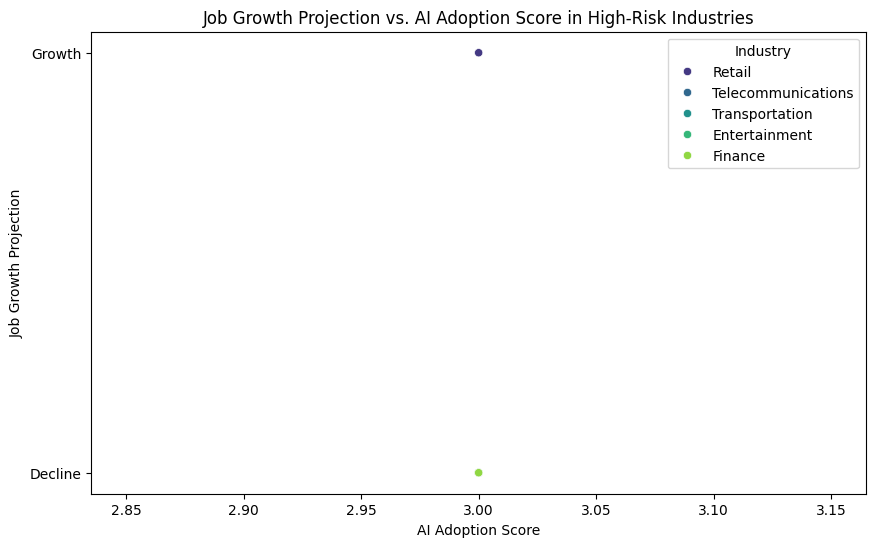

In [ ]:
#objective 1 working
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AI dataset
ai_df = pd.read_csv('ai_dataset.csv')

# Step 1: Display unique industries in the AI dataset
print("Unique industries in AI dataset:", ai_df['Industry'].unique())

# Step 2: Display statistics for AI Adoption Score and Automation Risk Score
print("\nAI Adoption Score Statistics:")
print(ai_df['AI Adoption Score'].describe())
print("\nAutomation Risk Score Statistics:")
print(ai_df['Automation Risk Score'].describe())

# Step 3: Visualize the distribution of scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ai_df['AI Adoption Score'], bins=10, color='blue', alpha=0.7)
plt.title('Distribution of AI Adoption Scores')
plt.xlabel('AI Adoption Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(ai_df['Automation Risk Score'], bins=10, color='red', alpha=0.7)
plt.title('Distribution of Automation Risk Scores')
plt.xlabel('Automation Risk Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Step 4: Determine thresholds based on quantiles (top 30% of each score)
high_ai_adoption_threshold = ai_df['AI Adoption Score'].quantile(0.7)
high_automation_risk_threshold = ai_df['Automation Risk Score'].quantile(0.7)

print(f"\nSelected Thresholds - AI Adoption Score: {high_ai_adoption_threshold}, Automation Risk Score: {high_automation_risk_threshold}")

# Step 5: Filter high-risk industries based on these thresholds
high_risk_industries = ai_df[(ai_df['AI Adoption Score'] >= high_ai_adoption_threshold) &
                             (ai_df['Automation Risk Score'] >= high_automation_risk_threshold)]

# Output the high-risk industries
if high_risk_industries.empty:
    print("No high-risk industries found with the current thresholds.")
else:
    print("High-risk industries based on AI adoption and automation risk:")
    print(high_risk_industries[['Industry', 'AI Adoption Score', 'Automation Risk Score']])

    # Step 6: Visualize the high-risk industries
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=high_risk_industries, x='AI Adoption Score', y='Job Growth Projection', hue='Industry', palette='viridis')
    plt.title('Job Growth Projection vs. AI Adoption Score in High-Risk Industries')
    plt.xlabel('AI Adoption Score')
    plt.ylabel('Job Growth Projection')
    plt.legend(title='Industry')
    plt.show()


Top Emerging Competencies in AI-driven Industries (Higher Frequency in High-AI Roles):
Required_Skills
Project Management    4
Sales                 1
Name: count, dtype: int64

Potentially Obsolete Competencies in an AI-driven Workforce (Higher Frequency in Low-AI Roles):
Required_Skills
Communication       1
Cybersecurity       4
Data Analysis       4
Machine Learning    1
Marketing           2
Name: count, dtype: int64


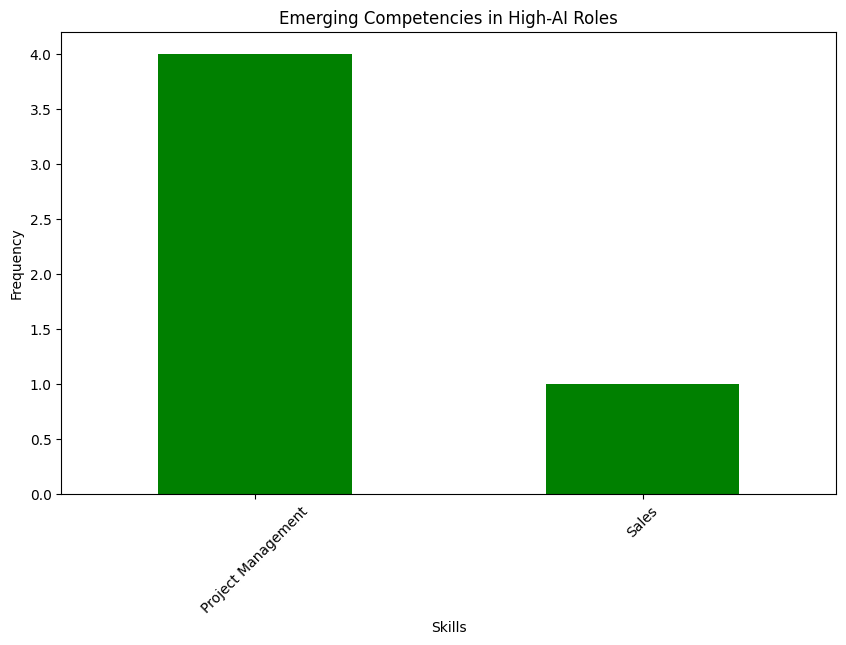

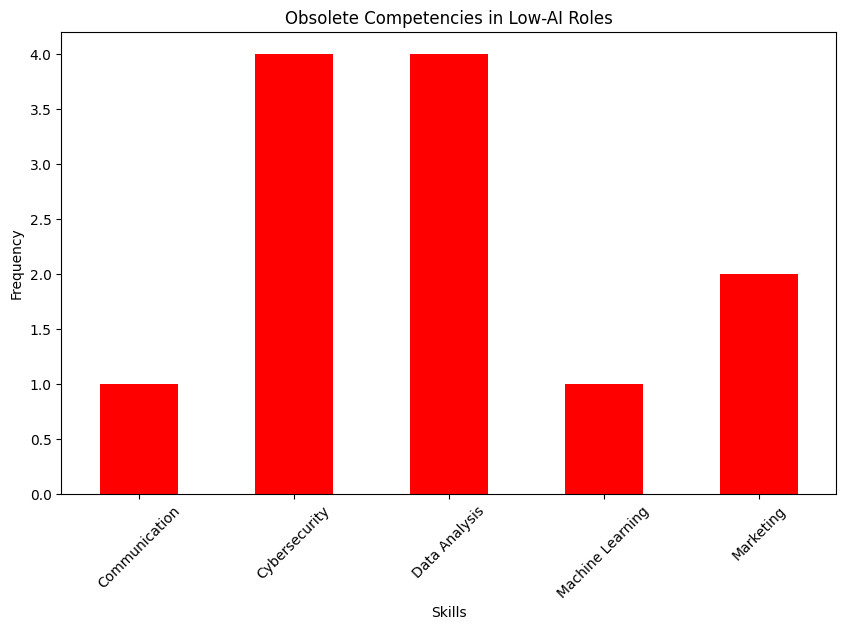

In [8]:
#objective 2

import pandas as pd

# Load datasets
ai_df = pd.read_csv('ai_dataset.csv')
employment_df = pd.read_csv('employment_dataset.csv')

# Filter for high and low AI adoption roles (Adjust the AI adoption score thresholds as needed)
high_ai_adoption_roles = ai_df[ai_df['AI Adoption Score'] > ai_df['AI Adoption Score'].median()]
low_ai_adoption_roles = ai_df[ai_df['AI Adoption Score'] <= ai_df['AI Adoption Score'].median()]

# Extract and clean skill data
# Assuming 'Required_Skills' column contains the skills for each role
high_ai_skills = high_ai_adoption_roles['Required_Skills'].dropna().str.split(',').explode().str.strip()
low_ai_skills = low_ai_adoption_roles['Required_Skills'].dropna().str.split(',').explode().str.strip()

# Calculate the frequency of each skill in high and low AI roles
high_ai_skills_frequency = high_ai_skills.value_counts()
low_ai_skills_frequency = low_ai_skills.value_counts()

# Reindex both skill frequencies to ensure alignment
all_skills = high_ai_skills_frequency.index.union(low_ai_skills_frequency.index)
high_ai_skills_frequency = high_ai_skills_frequency.reindex(all_skills, fill_value=0)
low_ai_skills_frequency = low_ai_skills_frequency.reindex(all_skills, fill_value=0)

# Identify emerging competencies (more frequent in high AI roles)
emerging_skills = high_ai_skills_frequency[high_ai_skills_frequency > low_ai_skills_frequency].head(20)

# Identify obsolete skills (more frequent in low AI roles)
obsolete_skills = low_ai_skills_frequency[low_ai_skills_frequency > high_ai_skills_frequency].head(20)

# Output emerging skills and obsolete skills
print("Top Emerging Competencies in AI-driven Industries (Higher Frequency in High-AI Roles):")
print(emerging_skills)

print("\nPotentially Obsolete Competencies in an AI-driven Workforce (Higher Frequency in Low-AI Roles):")
print(obsolete_skills)

# Visualize the results using bar charts
import matplotlib.pyplot as plt

# Plot emerging skills
plt.figure(figsize=(10, 6))
emerging_skills.plot(kind='bar', color='green', title='Emerging Competencies in High-AI Roles')
plt.ylabel('Frequency')
plt.xlabel('Skills')
plt.xticks(rotation=45)
plt.show()

# Plot obsolete skills
plt.figure(figsize=(10, 6))
obsolete_skills.plot(kind='bar', color='red', title='Obsolete Competencies in Low-AI Roles')
plt.ylabel('Frequency')
plt.xlabel('Skills')
plt.xticks(rotation=45)
plt.show()


Columns in Employment Dataset: Index(['Timestamp', 'Name', 'Age group', 'Gender', 'Where are you from?',
       'Marital status', 'Work experience', 'Educational Qualification',
       'Are you still studying?', 'Do you believe degree is a must for job?',
       'Interested area of work', 'Currently employed',
       'Did you have a career break?', 'Did you switch your career?',
       'Reason for shift in career?', 'Are you actively applying for job?',
       'Skills that you are confident', 'Job preference',
       'Have you carried out any independent works or projects?',
       'Where do you search for Job?',
       'Are you receiving response from recruiter after applying?',
       'Are you interested in Freelancing?', 'Dream company type?',
       'Preference of work', 'What are the problems faced while job search?',
       'Unnamed: 25'],
      dtype='object')
                         Timestamp             Name Age group  Gender  \
0  2023/01/11 10:15:18 AM GMT+5:30            A

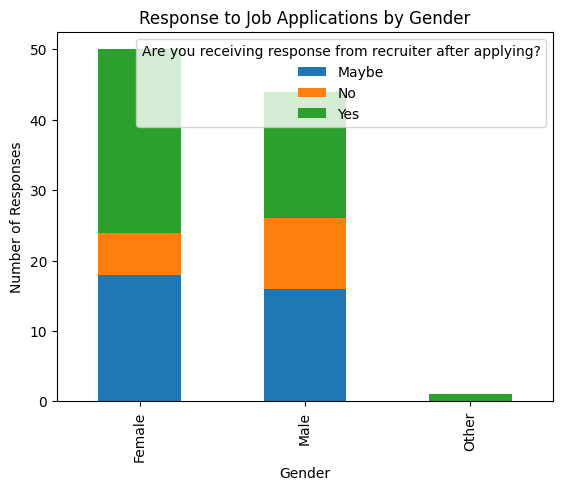

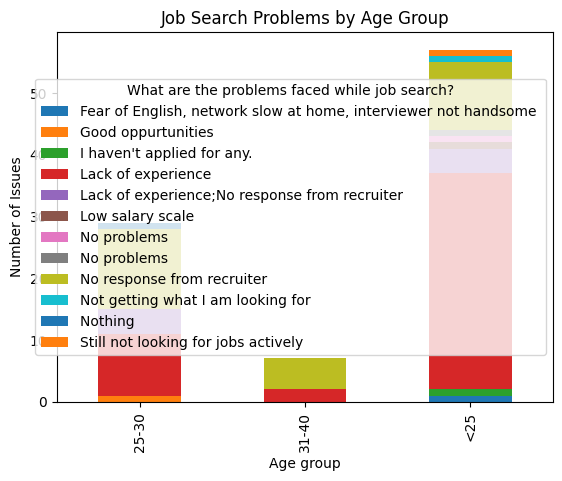

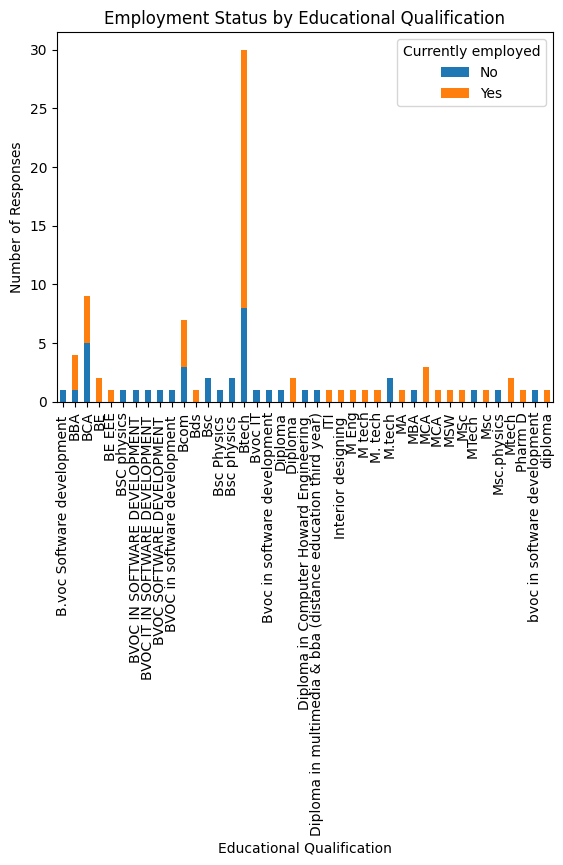

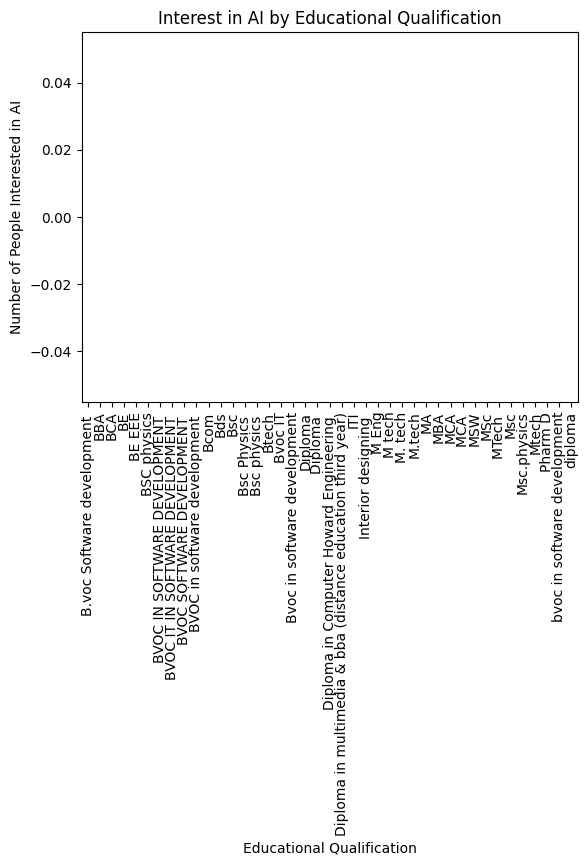


Societal Challenges Analysis Report:
1. Gender and AI automation impact:  Gender  Are you receiving response from recruiter after applying?
Female  Yes                                                          26
        Maybe                                                        18
        No                                                            6
Male    Yes                                                          18
        Maybe                                                        16
        No                                                           10
Other   Yes                                                           1
Name: count, dtype: int64
2. Age group disparities in job search issues:  Age group  What are the problems faced while job search?                   
25-30      No response from recruiter                                          13
           Lack of experience                                                  10
           Lack of experience;No response

In [9]:
#objective 3
import pandas as pd
import matplotlib.pyplot as plt

# Load the employment dataset
employment_df = pd.read_csv('employment_dataset.csv')

# Clean up column names by stripping any leading/trailing whitespaces
employment_df.columns = employment_df.columns.str.strip()

# Verify the columns again to check if 'Educational Qualification' exists
print("Columns in Employment Dataset:", employment_df.columns)

# Check the first few rows to understand its structure
print(employment_df.head())

# -----------------------------------------------
# 1. Gender and AI automation impact
# -----------------------------------------------
gender_response = employment_df.groupby('Gender')['Are you receiving response from recruiter after applying?'].value_counts()

# Visualize the results for gender response
gender_response.unstack().plot(kind='bar', stacked=True, title='Response to Job Applications by Gender')
plt.ylabel('Number of Responses')
plt.show()

# -----------------------------------------------
# 2. Age group disparities in job search issues
# -----------------------------------------------
age_group_issues = employment_df.groupby('Age group')['What are the problems faced while job search?'].value_counts()

# Visualize the results for age group issues
age_group_issues.unstack().plot(kind='bar', stacked=True, title='Job Search Problems by Age Group')
plt.ylabel('Number of Issues')
plt.show()

# -----------------------------------------------
# 3. Educational qualification and job application status
# -----------------------------------------------
if 'Educational Qualification' in employment_df.columns:
    # Group by 'Educational Qualification' and count 'Currently employed' status
    education_status = employment_df.groupby('Educational Qualification')['Currently employed'].value_counts()

    # Visualize the results with a stacked bar chart
    education_status.unstack().plot(kind='bar', stacked=True, title='Employment Status by Educational Qualification')
    plt.ylabel('Number of Responses')
    plt.show()
else:
    print("Error: 'Educational Qualification' column not found in the dataset.")

# -----------------------------------------------
# 4. Interest in AI by Educational Qualification
# -----------------------------------------------

ai_interest = employment_df.groupby('Educational Qualification')['Interested area of work'].apply(lambda x: x.str.contains('AI').sum())

# Visualize the interest in AI-related fields by educational qualification
ai_interest.plot(kind='bar', color='purple', title='Interest in AI by Educational Qualification')
plt.ylabel('Number of People Interested in AI')
plt.show()

# -----------------------------------------------
# 5. Final Insights and Report Generation
# -----------------------------------------------
print("\nSocietal Challenges Analysis Report:")
print("1. Gender and AI automation impact: ", gender_response)
print("2. Age group disparities in job search issues: ", age_group_issues)
print("3. Educational qualification and job application status: ", education_status)
print("4. Interest in AI by educational qualification: ", ai_interest)
